In [1]:
#Exercicio 1.1.2
function ln3(numeroDeIteracoes, chute)#numero de iterações e chute inicial
   for i=1:numeroDeIteracoes
        chute = chute - ((exp(chute)-3)/exp(chute))
    end
    return chute
end

ln3 (generic function with 1 method)

In [2]:
#Exercicio 1.1.2
ln3(20,1.1)

1.0986122886681098

In [11]:
#Exercicio 1.1.3

#taylor de ordem 2
#f(x) - (f(a) + f'(a)(x-a) + (f''(a) *(x-a)^2)/2      <= M((x-a)^3)/6
# a = e
1 + ((3-exp(1))/exp(1)) - (((3-exp(1))^2)/2)/((exp(1))^2)

1.0982678724638968

In [10]:
#Exercicio 1.1.3
#Erro de taylor em ordem 2, menor que 10^-3

#(M(x-a)^3)/6
(2/(exp(1))^3) * ((3-exp(1))^3)/6 

#erro

0.00037105636225489186

In [9]:
(1/(exp(1))^2) * ( ((3-exp(1))^2)/ factorial(2)) 

0.005370451050430154

In [1]:
using LinearAlgebra

In [3]:
#exercicio 1.1.4
function interpolação1(x,y)
    #criar a matriz V
    V=[x.^0 x.^1]
    c=V\y
    return c #vetor de coeficientes
end

interpolação1 (generic function with 1 method)

In [10]:
#exercicio 1.1.4
x=[exp(1); exp(1.1)]
y=[1, 1.1]
interpolação1(x,y)

2-element Array{Float64,1}:
 0.04916680552249564
 0.34979198423164165

In [13]:
#exercicio 1.1.4
0.04916680552249564 + 0.34979198423164165  * 3

1.0985427582174205

In [23]:
#exercicio 1.1.4
#ERRO

# o erro é dado por(M(x-xo)(x-x1))/(n+1)!
# temos então

# f'n+1(x) = -1/x^2

# |-1/(e^1)^2| * ((3-e^1) (3-e^1.1)) / 2!

((-1/(exp(1))^2) *(3-exp(1)) * (3-exp(1.1)))/ factorial(2)

7.941776548122973e-5

In [1]:
using Plots
using Random
using LinearAlgebra

In [18]:
function vandermonde(x,y,grau)
    n,=size(y) #pegando o tamanho do vetor y
    V=zeros(n, grau+1) #criando uma matriz de zeros
    for i=1:n #linhas
        for j=1:(grau+1) #colunas
            V[i,j]=x[i]^(j-1) #calculando as resprectivas potencias do polinomio
        end
    end
    return V # retona a matriz de vandermonde
end

vandermonde (generic function with 1 method)

In [19]:
function regressão(x,y,grau)
    V=vandermonde(x,y,grau) #montando a matriz de vondermonde
    c=V\y # resolve o  sistema linear. já faz minimos quadrados
    return c #retorna os coeficientes
end

regressão (generic function with 1 method)

In [4]:
function gerapoli(xs,ys,ngrau)
    coeficientes = regressão(xs,ys,ngrau) #gerando os coeficientes
    f(x) = sum([coeficientes[i+1]*x^i for i in 0:ngrau]) #gerando um polinomio dependendo do grau
    return f #retornando o polinomio
end

gerapoli (generic function with 1 method)

In [5]:
function gerapoli_plot(x,y,grau)
    scatter(x, y, c=:lightblue, ms=3, leg=false) #plota os pontos
    plot!(gerapoli(x,y,grau),0,1)                #plota o polinimio
end

gerapoli_plot (generic function with 1 method)

In [61]:
#execicio 1.2
#Gere aleatoriamente 30 pontos de um polinômio de grau 5.
    
Random.seed!(0)
n = 30
x = range(0, 1, length=n) 

g0(x) = 1.0
g1(x) = x
g2(x) = x^2
g3(x) = x^3
g4(x) = x^4
g5(x) = x^5 

30-element Array{Float64,1}:
 1.0679107426035777
 1.118555632263076 
 1.0387732184790417
 1.1018978612051724
 1.2186537196124108
 1.2380351775505807
 1.2672654215785755
 1.307019358939855 
 1.328922743705238 
 1.606137527211332 
 1.4548590781238295
 1.53003236076066  
 1.737067147824594 
 ⋮                 
 2.713238643003059 
 2.6926019865932016
 2.8638135516135383
 3.0421947495134383
 3.467410393431956 
 3.6215820844242255
 3.9645407672533968
 4.285435821470387 
 4.6105878705573895
 5.103227444961951 
 5.535956629504599 
 5.9237322940332575

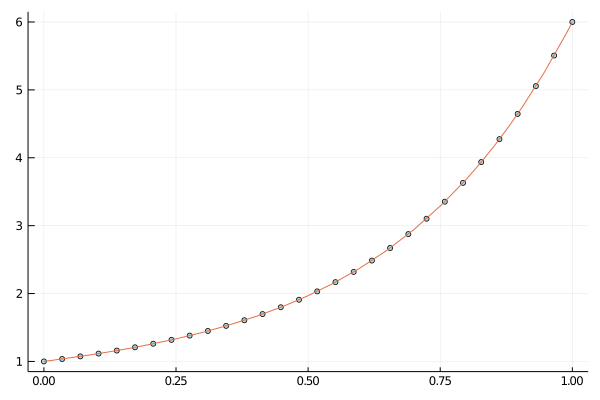

In [96]:
#exercicio 1.2.2
y = g0.(x) + g1.(x) + g2.(x) +  g3.(x) + g4.(x) +  g5.(x) + randn(n) * 0.1 #pontos de um polinomio de grau 5 + ruido
y1 = g0.(x) + g1.(x) + g2.(x) +  g3.(x) + g4.(x) +  g5.(x) #pontos de um polinomio de grau 5 
#gerapoli_plot(x,y,29)
gerapoli_plot(x,y1,29)

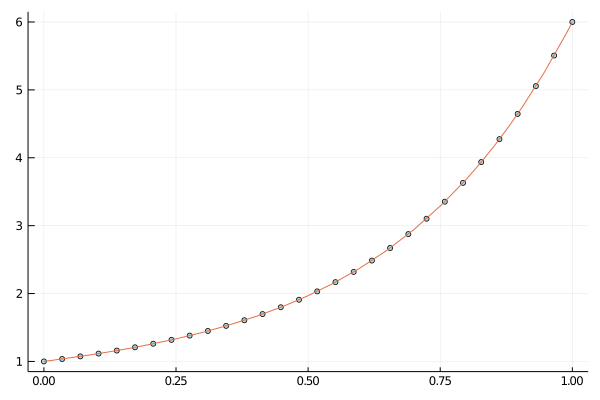

In [99]:
#exercicio 1.2.3
y = g0.(x) + g1.(x) + g2.(x) +  g3.(x) + g4.(x) +  g5.(x) + randn(n) * 0.1 #pontos de um polinomio de grau 5 + ruido
y1 = g0.(x) + g1.(x) + g2.(x) +  g3.(x) + g4.(x) +  g5.(x) #pontos de um polinomio de grau 5 
#gerapoli_plot(x,y,30)
gerapoli_plot(x,y1,30)

In [64]:
#metodo para calcular o erro
function erro_total(x,y,modelo)
    n,=size(y) #quantidade de pontos em y
    S=0       # erro iniciado em 0  
    for i=1:n #iterando pela quantidade de pontos
        S=S+(y[i]-modelo(x[i]))^2 # Fazendo o somatório do quadrado da diferenta entre o ponto e o modelo passado
    end
    return sqrt(S) #tirando a raiz quadrada para retornar o erro sem estar ao quadrado 
end

erro_total (generic function with 1 method)

In [65]:
#exercicio 1.2.4

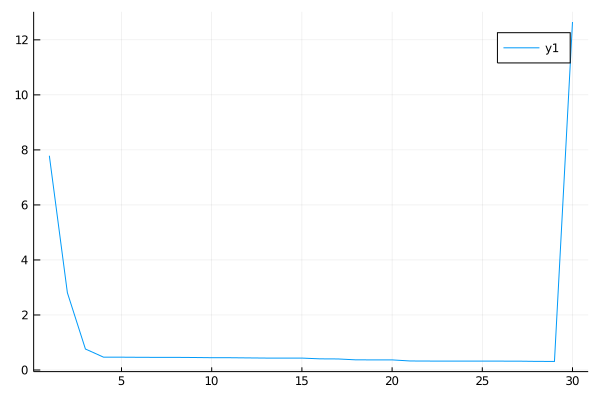

In [66]:
polinomios = [gerapoli(x,y,i) for i in 0:29]            # gerando um vetor com polinomios com grau de 0 a 29
erros  =[erro_total(x,y,polinomios[i]) for i in 1:30]  # gerando um vetor com os erros de todos os polinomios criados antes
plot(erros)  #plotando o erro total por grau do polinomio

In [60]:
using LinearAlgebra

In [8]:
#exercicio 1.3
V = [1 -1  0  0  0  0  0  0  0;
     0  0  1 -1  0  0  0  0  0; 
     0  0  0  0  1 -1  0  0  0;
     0  0  0  0  0  1 -1  0  0;
     0  0  0  0  0 -1  0  0  1;
     0 -1  0  0  0  0  0  1  0;
     1  0 -1  0  0  0  0  0  0;
     0  0  0  0  1  0  0 -1  0;
     0  0  0  1  0 -1  0  0  0; 
     0  0  1  0  0 -1  0  0  0;
     0 -1  0  0  0  0  0  0  1;
     0  0  0  0  1  0 -1  0  0;
     1  0  0  0  0  0 -1  0  0;
     0  0  0 -1  1  0  0  0  0;
     0  1  0  0  0  0  0  0  0]

y= [ 11; 3; 7; 2; 9; 7; 5; 5; 2; 2; 11; 5; 3; 7; 5]

c = V\y

9-element Array{Float64,1}:
 15.221680876979285
  4.999999999999995
 11.405602923264302
  9.65408038976857 
 16.21559074299634 
  9.34104750304506 
 10.259439707673561
 11.607795371498165
 17.170523751522534

In [9]:
using Plots

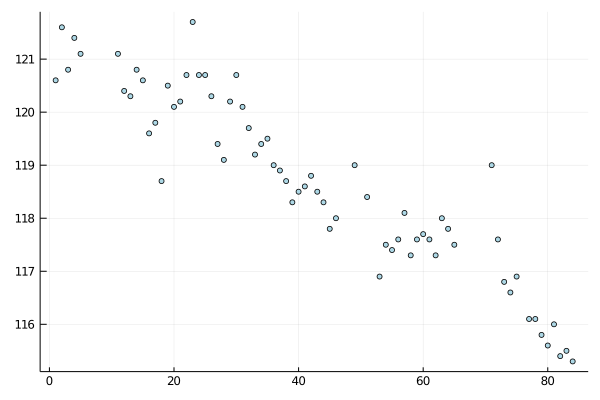

In [316]:
#Exercicio 1.4
x=[1;2;3;4;5;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;31;32;33;34;35;36;37;38;39;40;41;42;43;44;45;
46;49;51;53;54;55;56;57;58;59;60;61;62;63;64;65;71;72;73;74;75;77;78;79;80;81;82;83;84]  #datas transformadas em dias corridos

y=[120.6;121.6;120.8;121.4;121.1;121.1;120.4;120.3;120.8;120.6;119.6;119.8;118.7;120.5;120.1;120.2;120.7;121.7;120.7;
120.7;120.3;119.4;119.1;120.2;120.7;120.1;119.7;119.2;119.4;119.5;119;118.9;118.7;118.3;118.5;118.6;118.8;118.5;118.3;
117.8;118;119;118.4;116.9;117.5;117.4;117.6;118.1;117.3;117.6;117.7;117.6;117.3;118;117.8;117.5;119;117.6;116.8;116.6;116.9;
116.1;116.1;115.8;115.6;116;115.4;115.5;115.3]    #peso respectivo pra cada dia

scatter(x, y, c=:lightblue, ms=3, leg=false)

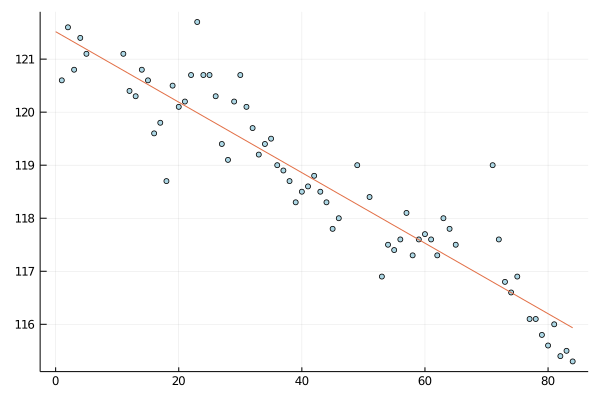

In [317]:
cpeso=regressão(x,y,1) # fazendo a regressão para grau 1
peso(x) = cpeso[1]  + cpeso[2]*x #criando um polinomio de grau 1
scatter(x, y, c=:lightblue, ms=3, leg=false) #plotando os pontos
plot!(peso,0,84) #plotando a função aproximada

In [330]:
peso(173)  #sem considerar um comportamento exponencial

110.01778350592397

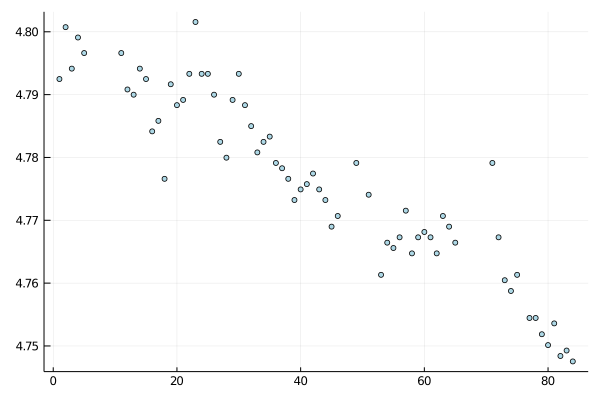

In [319]:
#calculos no mundo barra
y_barra=log.(y) #tirando log dos valores do eixo y
scatter(x,y_barra, c=:lightblue, ms=3, leg=false)

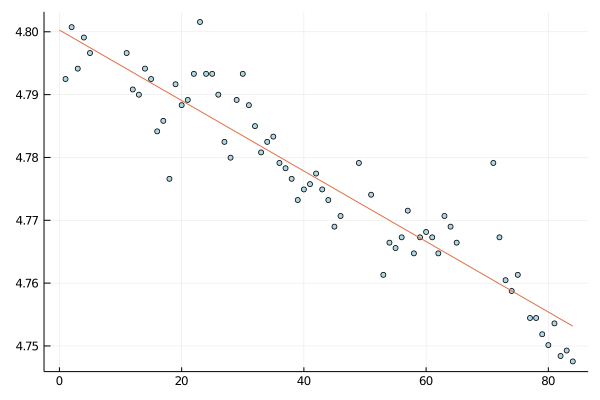

In [320]:
cpeso_barra=regressão(x,y_barra,1) #fazendo a regressão com os pontos com log e grau 1
peso_barra(x) = cpeso_barra[1]  + cpeso_barra[2]*x #gerando um polinomio diferente
scatter(x,y_barra, c=:lightblue, ms=3, leg=false)
plot!(peso_barra,0,84) #plotando

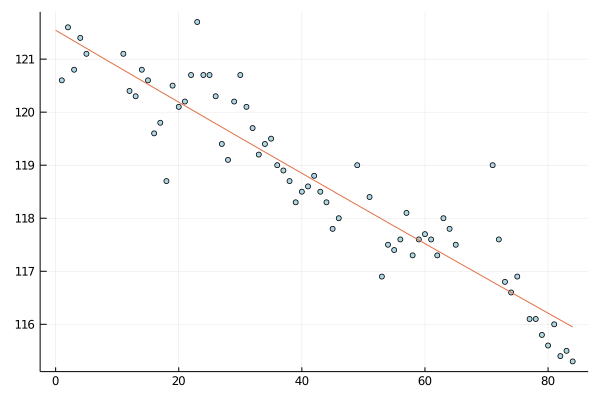

In [321]:
#voltando para o mundo original
c1=exp(cpeso_barra[1]) #coeficiente c1 no mundo original
c2=cpeso_barra[2]      #coeficiente c2 no mundo original
peso_exponencial(x)=c1*exp(c2*x) #modelo exponencial
scatter(x, y,c=:lightblue, ms=3, leg=false)
plot!(peso_exponencial,0,84)

In [322]:
peso_exponencial(177)  #considerando um comportamento exponencial

110.05581225548862

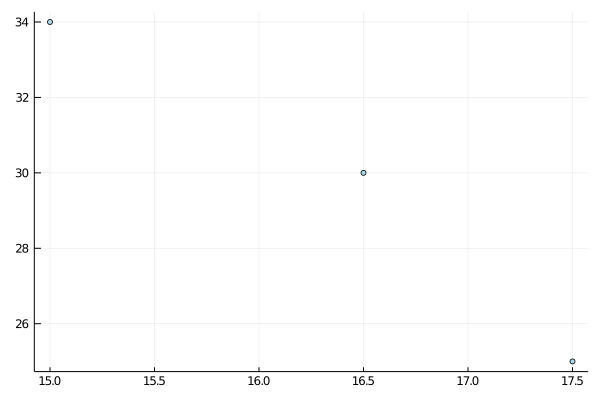

In [30]:
#exercicio 1.5
x=[15,16.5,17.5]  #horarios das medições
y=[34,30,25]      #temperatura em dado horario

scatter(x, y,c=:lightblue, ms=3, leg=false)

In [31]:
y_barra=log.(y) #tirando o log para linearizar a função

3-element Array{Float64,1}:
 3.5263605246161616
 3.4011973816621555
 3.2188758248682006

In [32]:
c_barra=regressão(x, y_barra, 1) #calculando os coeficientes do polinomio por regressão

2-element Array{Float64,1}:
  5.340043630001425  
 -0.11987137058893378

In [33]:
peso_barra(x) = c_barra[1] + c_barra[2]*x #montando o polinomio com os coeficientes encontrados

peso_barra (generic function with 1 method)

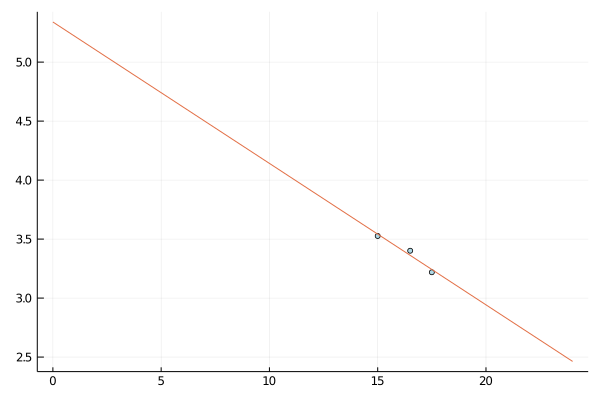

In [34]:
scatter(x, y_barra ,c=:lightblue, ms=3, leg=false)
plot!(peso_barra,0,24)

In [35]:
c1 = exp(c_barra[1]) 
c2 = c_barra[2]

peso_exp(x)= c1*exp(c2*x) #função exponencial no "mundo real"

peso_exp (generic function with 1 method)

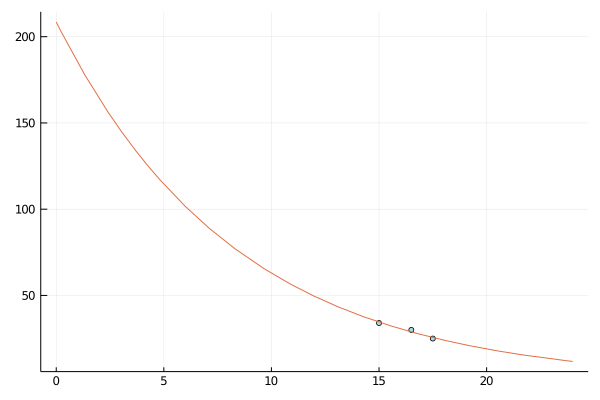

In [36]:
scatter(x, y ,c=:lightblue, ms=3, leg=false)
plot!(peso_exp,0,24)

In [47]:
peso_exp(14.42)  #morreu em 14:25

37.02148671468652